# Course Exam

### Imporing the relevant libraries

In [41]:
# The function which will generate the random set of datapoints
# and will distribute them into a specified number of classes
from sklearn.datasets import make_blobs
# A module for handling data
import pandas as pd
# Python's plotting module.
# We improve the graphics by overriding the default matplotlib styles with those of seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# A method used to split the dataset into training and testing
from sklearn.model_selection import train_test_split
# The K-nearest neighbors classifier from the sklearn library
from sklearn.neighbors import KNeighborsClassifier
# Metrics that would allow us to evaluate our model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
# A class that would help us find the best model from a specified set of models.
from sklearn.model_selection import GridSearchCV
# A function that would plot for us the decision regions of a problem
from mlxtend.plotting import plot_decision_regions
# This library will be used to measure the difference in times between the start and the end of a process
import time
# The Python package for scientific computing
import numpy as np

### Define the datasets

In [42]:
inputs, target = make_blobs(n_samples = 750,
                            centers = 5,
                            cluster_std = 2,
                            random_state = 365)

In [43]:
data = pd.DataFrame(data = inputs, columns = ['Feature 1', 'Feature 2'])
data['Target'] = target
data

,Feature 1,Feature 2,Target
0,-0.300205,-2.003160,2
1,1.163450,-1.053711,1
2,4.562653,-7.993479,3
3,5.102392,-5.749810,3
4,9.626547,3.413710,0
...,...,...,...
745,2.508037,-5.233041,4
746,-2.141836,-4.764437,2
747,-2.015934,-7.559172,4
748,-2.703408,-7.308947,4


<ipython-input-44-aa4fcc3b5e11>:4: UserWarning: 
The markers list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = 'Feature 1', y = 'Feature 2',


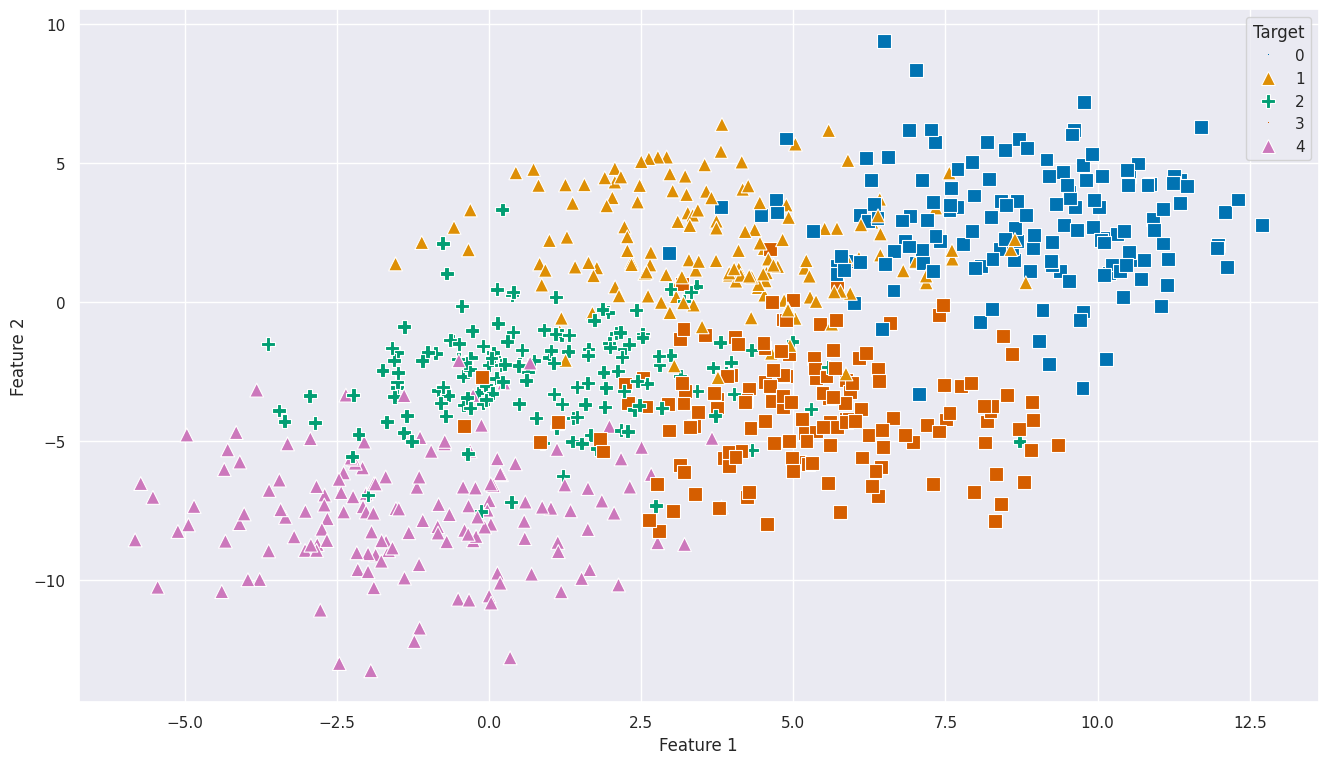

In [44]:
# Apply the seaborn style
sns.set()
plt.figure(figsize = (16, 9))
sns.scatterplot(x = 'Feature 1', y = 'Feature 2',
                data = data,
                hue = 'Target',
                palette = 'colorblind',
                markers = [',', '^', 'P'],
                style = 'Target',
                s = 100);

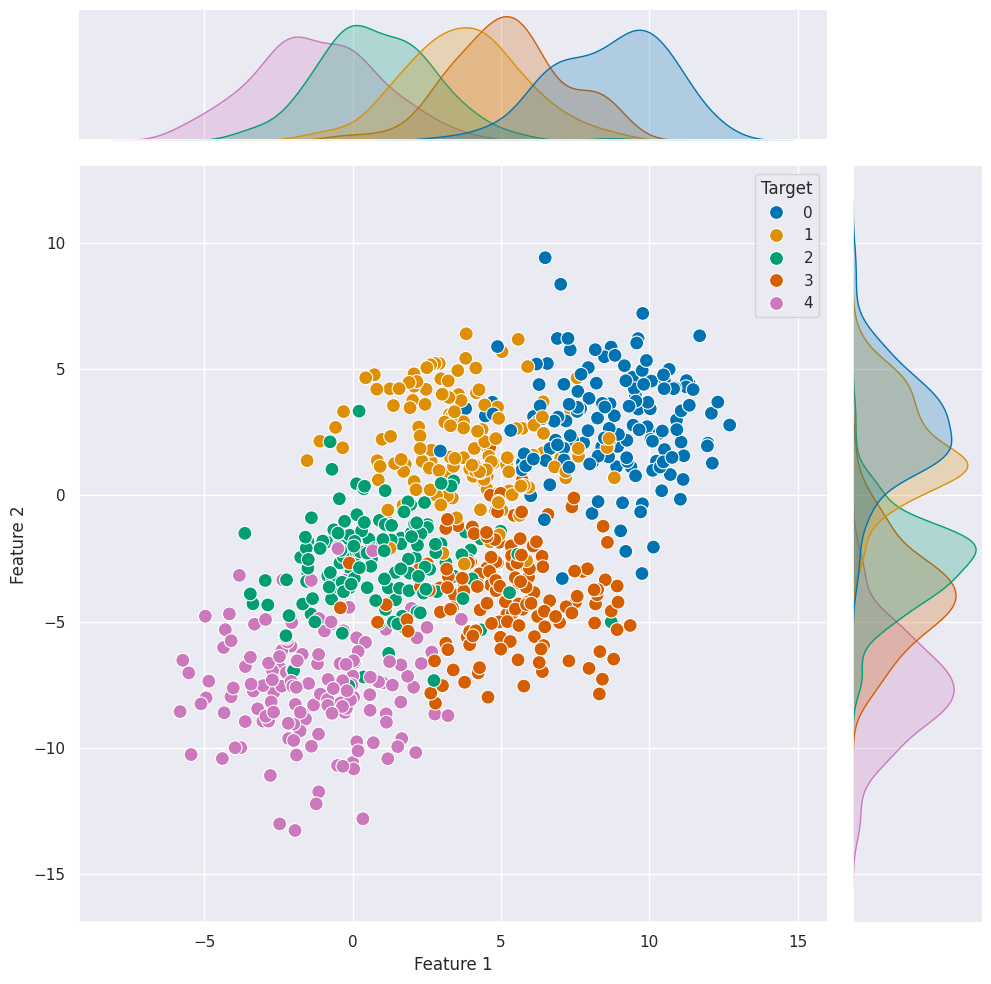

In [45]:

sns.set()
# Create a seaborn jointplot.
sns.jointplot(x = 'Feature 1', y = 'Feature 2',
              data = data,
              hue = 'Target',
              palette = 'colorblind',
              height = 10,
              s = 100,
              legend = True);

In [46]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target,
                                                    train_size=500,
                                                    test_size=250,
                                                    random_state=365,
                                                    stratify=target)

In [47]:
# Choose a set of parameters to test in the form of a dictionary.
parameters = {'n_neighbors':range(1, 11),
              'weights':['uniform', 'distance']}

In [48]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = parameters,
                           scoring = 'accuracy')

In [49]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [50]:
# Return the parameters of the best model
grid_search.best_params_

{'n_neighbors': 6, 'weights': 'uniform'}

In [51]:
# Predict the classes of the samples in the test dataset using the best model.
clf = grid_search.best_estimator_
y_test_pred = clf.predict(x_test)
y_test_pred.shape

(250,)

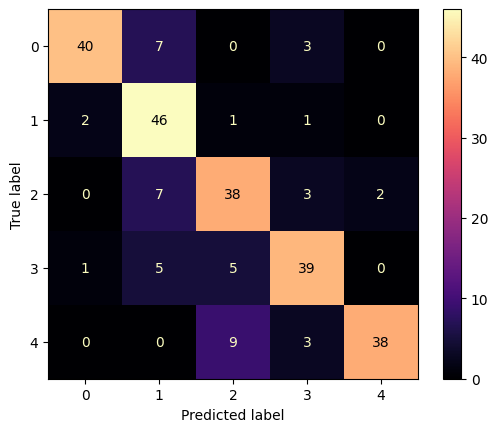

In [52]:

sns.reset_orig()

# Create a confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

In [53]:
print(classification_report(y_test, y_test_pred, target_names = ['0', '1', '2','3','4']))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        50
           1       0.71      0.92      0.80        50
           2       0.72      0.76      0.74        50
           3       0.80      0.78      0.79        50
           4       0.95      0.76      0.84        50

    accuracy                           0.80       250
   macro avg       0.82      0.80      0.81       250
weighted avg       0.82      0.80      0.81       250



In [54]:
parameters = {'n_neighbors':range(1, 11), 'p' : range(1,5),
              'weights':['uniform', 'distance']}

In [55]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = parameters,
                           scoring = 'accuracy')

In [56]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11), 'p': range(1, 5),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [57]:
grid_search.best_params_

{'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}

In [58]:
clf = grid_search.best_estimator_
y_test_pred = clf.predict(x_test)
y_test_pred.shape

(250,)

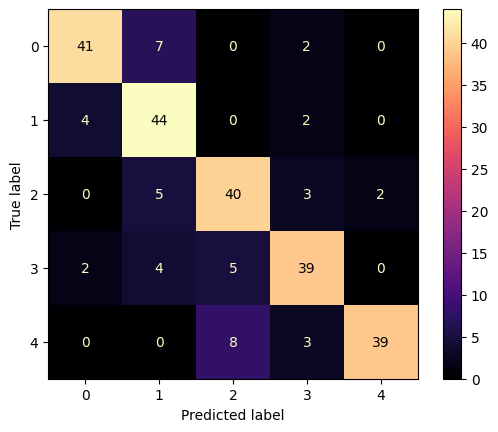

In [59]:

sns.reset_orig()

# Create a confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

In [60]:
# Print the classifcation report
print(classification_report(y_test, y_test_pred, target_names = ['0', '1', '2','3','4']))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85        50
           1       0.73      0.88      0.80        50
           2       0.75      0.80      0.78        50
           3       0.80      0.78      0.79        50
           4       0.95      0.78      0.86        50

    accuracy                           0.81       250
   macro avg       0.82      0.81      0.81       250
weighted avg       0.82      0.81      0.81       250

